<a href="https://colab.research.google.com/github/DivyaDileep2210/Projects/blob/main/int_Lungcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/lung_cancer_examples.csv")

In [ ]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [ ]:
df.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [ ]:
import seaborn as sns

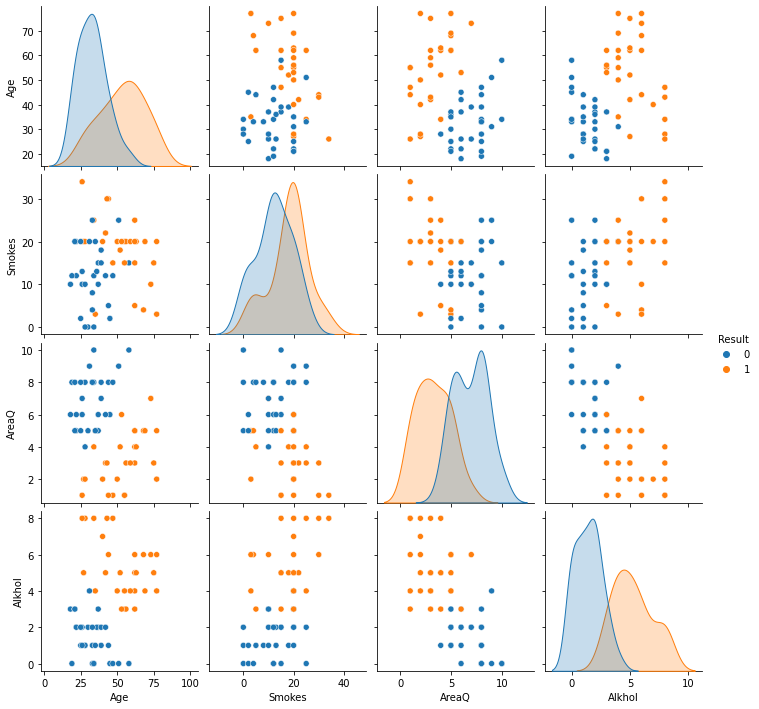

In [ ]:
sns.pairplot(df,hue="Result")

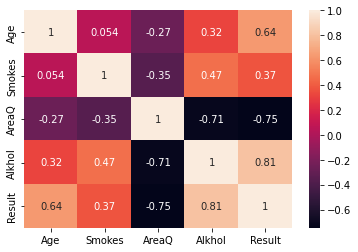

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [ ]:
x = df[['Age', 'Smokes', 'AreaQ', 'Alkhol']]
y = df["Result"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
x_train.shape , x_test.shape, x_train.shape[1]

((47, 4), (12, 4), 4)

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()
#Input Layer
model.add(Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
#Hidden Layer
model.add(Dense(64,activation='relu'))
#output layer
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
2/2 [==============================] - 1s 8ms/step - loss: 3.2305 - accuracy: 0.4681
Epoch 2/20
2/2 [==============================] - 0s 12ms/step - loss: 1.7517 - accuracy: 0.4681
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.7579 - accuracy: 0.5106
Epoch 4/20
2/2 [==============================] - 0s 9ms/step - loss: 1.1308 - accuracy: 0.6383
Epoch 5/20
2/2 [==============================] - 0s 6ms/step - loss: 1.0943 - accuracy: 0.6170
Epoch 6/20
2/2 [==============================] - 0s 6ms/step - loss: 0.6643 - accuracy: 0.6809
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.4319 - accuracy: 0.7447
Epoch 8/20
2/2 [==============================] - 0s 7ms/step - loss: 0.5976 - accuracy: 0.5319
Epoch 9/20
2/2 [==============================] - 0s 7ms/step - loss: 0.6349 - accuracy: 0.5532
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.4841 - accuracy: 0.6383
Epoch 11/20
2/2 [=====================

In [ ]:
pred= model.predict(x_test)
y_pred=(pred>0.5)

1/1 [==============================] - 0s 77ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
confusion_matrix(y_test,y_pred)

array([[6, 0],
       [0, 6]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [ ]:
neurons = [4,16,32,64,128]
for i in range(5):
  model=Sequential()
  #Input Layer
  model.add(Dense(neurons[i],activation='relu',input_shape=(x_train.shape[1],)))
  #Hidden Layer
  model.add(Dense(64,activation='relu'))
  #output layer
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.fit(x_train,y_train,epochs=20,verbose=0)
  pred = model.predict(x_test)
  y_pred=(pred>0.5)
  print(f"\nAccuracy of the model with {neurons[i]}, 64 neurons in each hidden layers: ",accuracy_score(y_test,y_pred))


1/1 [==============================] - 0s 99ms/step

Accuracy of the model with 4, 64 neurons in each hidden layers:  0.5
1/1 [==============================] - 0s 146ms/step

Accuracy of the model with 16, 64 neurons in each hidden layers:  1.0
1/1 [==============================] - 0s 47ms/step

Accuracy of the model with 32, 64 neurons in each hidden layers:  1.0


1/1 [==============================] - 0s 57ms/step

Accuracy of the model with 64, 64 neurons in each hidden layers:  1.0


1/1 [==============================] - 0s 53ms/step

Accuracy of the model with 128, 64 neurons in each hidden layers:  1.0


In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Adam = Adam(lr=0.001)
SGD = SGD(lr=0.001)
RMSprop = RMSprop(lr=0.001)
Adadelta = Adadelta(lr=0.001)
Adagrad = Adagrad(lr=0.001)

optimizers = [Adam, SGD, RMSprop, Adadelta, Adagrad]
for i in range(5):
  model=Sequential()
  model.add(Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer=optimizers[i],metrics=['accuracy'])
  model.fit(x_train,y_train,epochs=20,verbose=0)
  pred = model.predict(x_test)
  y_pred=(pred>0.5)
  print(f"\nAccuracy of the model with {optimizers[i]}: ",accuracy_score(y_test,y_pred))


1/1 [==============================] - 0s 55ms/step

Accuracy of the model with <keras.optimizers.optimizer_v2.adam.Adam object at 0x7fa6f5c6ce90>:  1.0
1/1 [==============================] - 0s 46ms/step

Accuracy of the model with <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7fa6f5c6cc90>:  0.75
1/1 [==============================] - 0s 49ms/step

Accuracy of the model with <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7fa6f5c02190>:  1.0
1/1 [==============================] - 0s 48ms/step

Accuracy of the model with <keras.optimizers.optimizer_v2.adadelta.Adadelta object at 0x7fa6f5af3750>:  0.5
1/1 [==============================] - 0s 50ms/step

Accuracy of the model with <keras.optimizers.optimizer_v2.adagrad.Adagrad object at 0x7fa6f5bb6450>:  0.8333333333333334


In [ ]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [ ]:
age = int(input("Age: "))
smoke = int(input("Smokes: "))
areaq = int(input("AreaQ: "))
alkhol = int(input("Alkhol: "))

xnew = [[age,smoke,areaq,alkhol]]
pred = model.predict(xnew)
y_pred=(pred>0.5)
if y_pred==True:
  print("The person has Lung cancer")
else:
  print("Free from lung cancer")

Age: 30
Smokes: 40
AreaQ: 2
Alkhol: 4
1/1 [==============================] - 0s 27ms/step
Free from lung cancer
